# Testing Activity Entity Relationship Diagram (AER-Diagram)

The AER (Activity-Entity Relationship) Diagram provides a compact view of how object types relate per activity. In the context of streaming, these relationships are discovered incrementally using a lossy counting strategy, meaning infrequent patterns are forgotten over time to ensure memory efficiency.

What the AER Diagram Shows
Each activity is visualized as a cluster containing all participating object types, connected by directed edges labeled with their inferred cardinalities:

- 1..1
- 1..n
- n..1

Depending on the observed frequency distribution.

Unary participation (ac

## Tuning Parameters
You can control how frequently the model is updated and how aggressively rare relations are discarded using:

`relation_model_update_frequency` – how often to emit an updated model.

`relation_max_approx_error` – the approximation error used for lossy counting (lower = more precise, higher = more memory efficient).

In [22]:
# Imports
from pybeamline.algorithms.discovery.heuristics_miner_lossy_counting import heuristics_miner_lossy_counting
from pybeamline.algorithms.oc.oc_merge_operator import oc_merge_operator
import importlib
import pybeamline
from pybeamline.algorithms.oc.oc_operator import oc_operator
importlib.reload(pybeamline)
from IPython.display import display, Image
from pybeamline.utils.visualizer import Visualizer
from pybeamline.sources.dict_ocel_test_source import dict_test_ocel_source

In [23]:
# Source
dict_source = [
        {"activity": "Register Customer", "objects": {"Customer": ["c1"]}},
        {"activity": "Create Order", "objects": {"Customer": ["c1"], "Order": ["o1"]}},
        {"activity": "Add Item", "objects": {"Order": ["o1"], "Item": ["i1"]}},
        {"activity": "Add Item", "objects": {"Order": ["o1"], "Item": ["i2"]}},
        {"activity": "Reserve Item", "objects": {"Item": ["i1"]}},
        {"activity": "Pack Item", "objects": {"Item": ["i1","i2"], "Order": ["o1"]}},
        {"activity": "Ship Item", "objects": {"Item": ["i1","i2"], "Shipment": ["s1"]}},
        {"activity": "Send Invoice", "objects": {"Order": ["o1"], "Invoice": ["inv1"]}},
        {"activity": "Receive Review", "objects": {"Customer": ["c1"], "Order": ["o1"]}},
        ]
source = dict_test_ocel_source([(dict_source, 10)])

In [24]:
emitted_aer = []

source.pipe(
    oc_operator(),
    oc_merge_operator(),
).subscribe(lambda x: emitted_aer.append(x["aer_diagram"]))

In [25]:
for i, aer in enumerate(emitted_aer):
    print(f"AER-Diagram {i+1}:")
    print(aer)
    print("\n")

AER-Diagram 1:
ActivityERDiagram:


AER-Diagram 2:
ActivityERDiagram:


AER-Diagram 3:
ActivityERDiagram:
Add Item: Item → Order [ONE_TO_ONE]
Pack Item: Item → Order [MANY_TO_ONE]
Reserve Item: Item (unary)


AER-Diagram 4:
ActivityERDiagram:
Add Item: Item → Order [ONE_TO_ONE]
Pack Item: Item → Order [MANY_TO_ONE]
Reserve Item: Item (unary)


AER-Diagram 5:
ActivityERDiagram:
Add Item: Item → Order [ONE_TO_ONE]
Pack Item: Item → Order [MANY_TO_ONE]
Reserve Item: Item (unary)


AER-Diagram 6:
ActivityERDiagram:
Add Item: Item → Order [ONE_TO_ONE]
Pack Item: Item → Order [MANY_TO_ONE]
Reserve Item: Item (unary)


AER-Diagram 7:
ActivityERDiagram:
Create Order: Customer → Order [ONE_TO_ONE]
Add Item: Item → Order [ONE_TO_ONE]
Pack Item: Item → Order [MANY_TO_ONE]
Receive Review: Customer → Order [ONE_TO_ONE]
Register Customer: Customer (unary)
Reserve Item: Item (unary)


AER-Diagram 8:
ActivityERDiagram:
Create Order: Customer → Order [ONE_TO_ONE]
Add Item: Item → Order [ONE_TO_ONE]
Pac

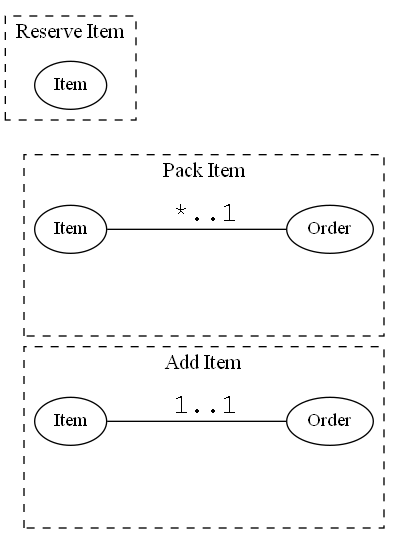

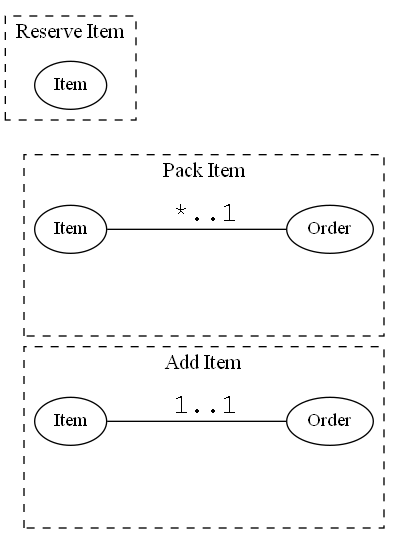

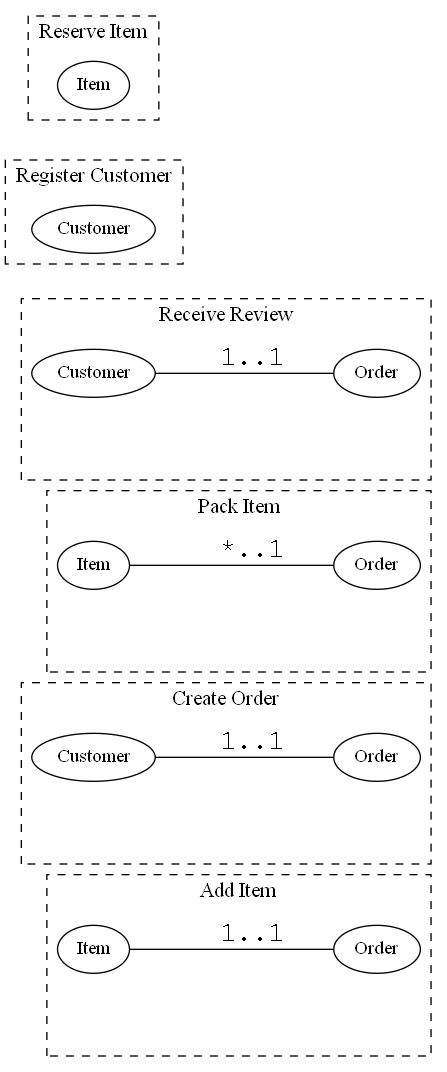

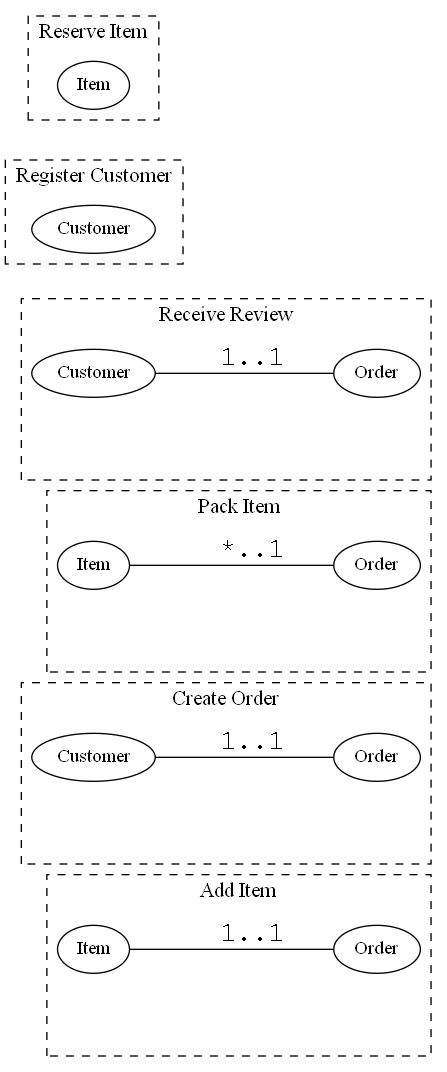

In [26]:
visualizer = Visualizer()
for i, aer in enumerate(emitted_aer):
    if i % 2 == 0:
        dot = visualizer.draw_aer_diagram(aer)
        png_bytes = dot.pipe(format='png')
        display(Image(data=png_bytes))


AER-Diagram 1:
ActivityERDiagram:


AER-Diagram 2:
ActivityERDiagram:


AER-Diagram 3:
ActivityERDiagram:


AER-Diagram 4:
ActivityERDiagram:
Create Order: Customer → Order [ONE_TO_ONE]
Receive Review: Customer → Order [ONE_TO_ONE]
Register Customer: Customer (unary)
Add Item: Order (unary)
Pack Item: Order (unary)
Send Invoice: Order (unary)


AER-Diagram 5:
ActivityERDiagram:
Create Order: Customer → Order [ONE_TO_ONE]
Receive Review: Customer → Order [ONE_TO_ONE]
Register Customer: Customer (unary)
Add Item: Order (unary)
Pack Item: Order (unary)
Send Invoice: Order (unary)


AER-Diagram 6:
ActivityERDiagram:
Create Order: Customer → Order [ONE_TO_ONE]
Receive Review: Customer → Order [ONE_TO_ONE]
Register Customer: Customer (unary)
Add Item: Order (unary)
Pack Item: Order (unary)
Send Invoice: Order (unary)


AER-Diagram 7:
ActivityERDiagram:
Create Order: Customer → Order [ONE_TO_ONE]
Receive Review: Customer → Order [ONE_TO_ONE]
Register Customer: Customer (unary)
Add Item: Order

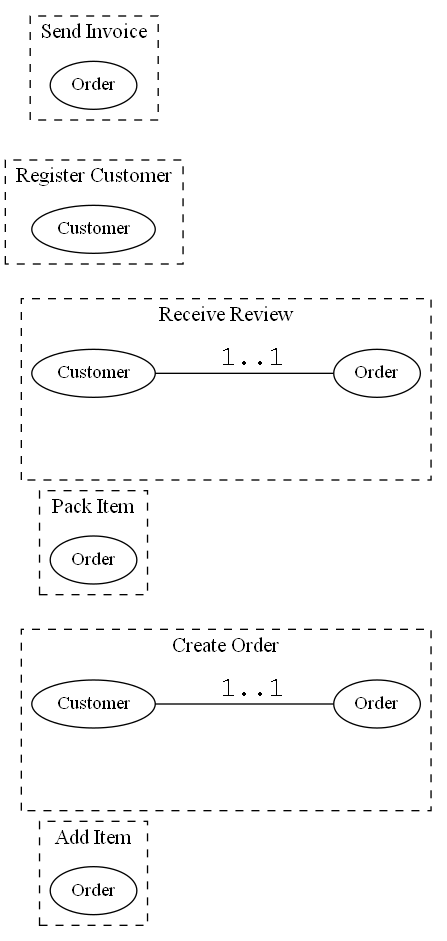

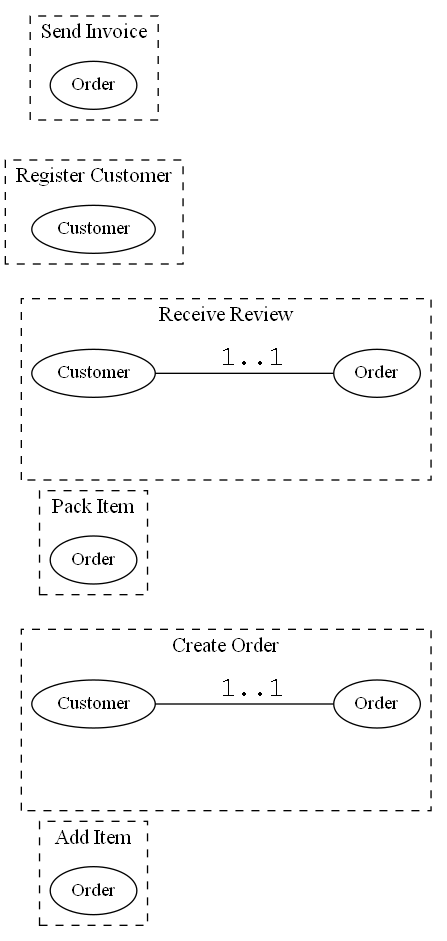

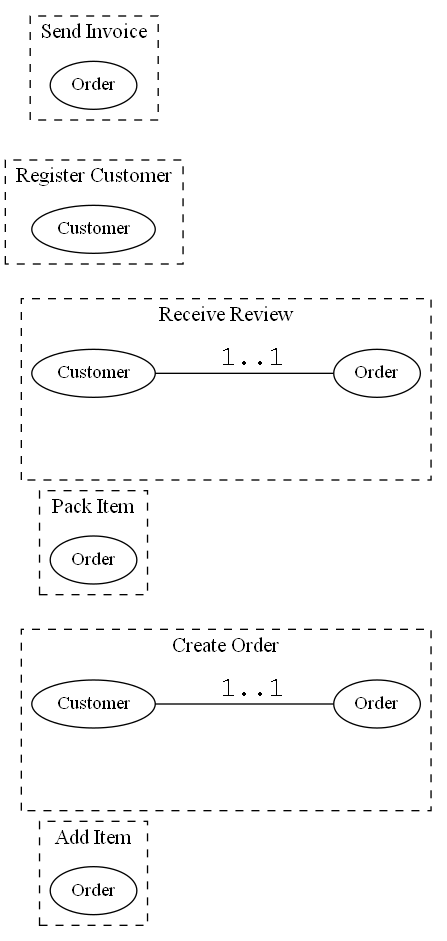

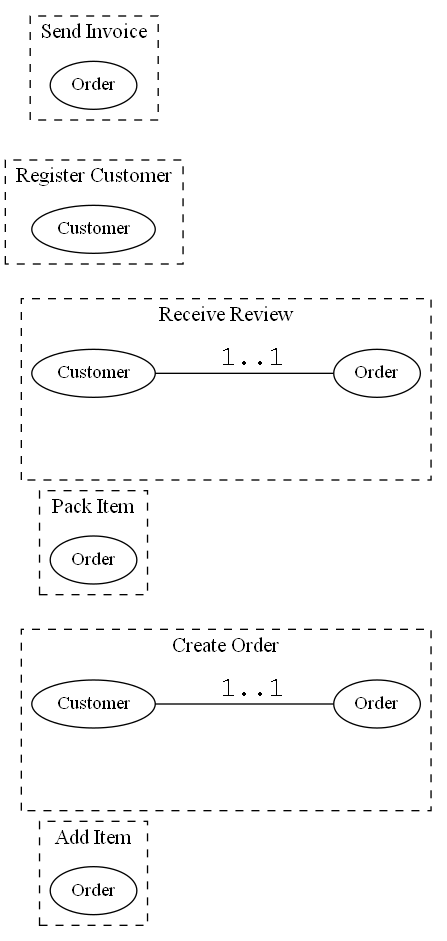

In [27]:
emitted_aer.clear()

control_flow = {
    "Customer": lambda : heuristics_miner_lossy_counting(10),
    "Order": lambda : heuristics_miner_lossy_counting(10),
}

source.pipe(
    oc_operator(control_flow=control_flow),
    oc_merge_operator(),
).subscribe(lambda x: emitted_aer.append(x["aer_diagram"]))

for i, aer in enumerate(emitted_aer):
    print(f"AER-Diagram {i+1}:")
    print(aer)
    print("\n")

for i, aer in enumerate(emitted_aer):
    if i % 2 == 0:
        dot = visualizer.draw_aer_diagram(aer)
        png_bytes = dot.pipe(format='png')
        display(Image(data=png_bytes))

## Visualization of Lossy Counting AER Diagram


#

AER-Diagram 1:
ActivityERDiagram:


AER-Diagram 2:
ActivityERDiagram:


AER-Diagram 3:
ActivityERDiagram:


AER-Diagram 4:
ActivityERDiagram:


AER-Diagram 5:
ActivityERDiagram:
Create Order: Customer → Order [ONE_TO_ONE]
Add Item: Item → Order [ONE_TO_ONE]
Register Customer: Customer (unary)
Reserve Item: Item (unary)


AER-Diagram 6:
ActivityERDiagram:
Create Order: Customer → Order [ONE_TO_ONE]
Add Item: Item → Order [ONE_TO_ONE]
Register Customer: Customer (unary)
Reserve Item: Item (unary)


AER-Diagram 7:
ActivityERDiagram:
Create Order: Customer → Order [ONE_TO_ONE]
Add Item: Item → Order [ONE_TO_ONE]
Register Customer: Customer (unary)
Reserve Item: Item (unary)


AER-Diagram 8:
ActivityERDiagram:
Create Order: Customer → Order [ONE_TO_ONE]
Add Item: Item → Order [ONE_TO_ONE]
Register Customer: Customer (unary)
Reserve Item: Item (unary)


AER-Diagram 9:
ActivityERDiagram:
Create Order: Customer → Order [ONE_TO_ONE]
Add Item: Item → Order [ONE_TO_ONE]
Register Customer: Custome

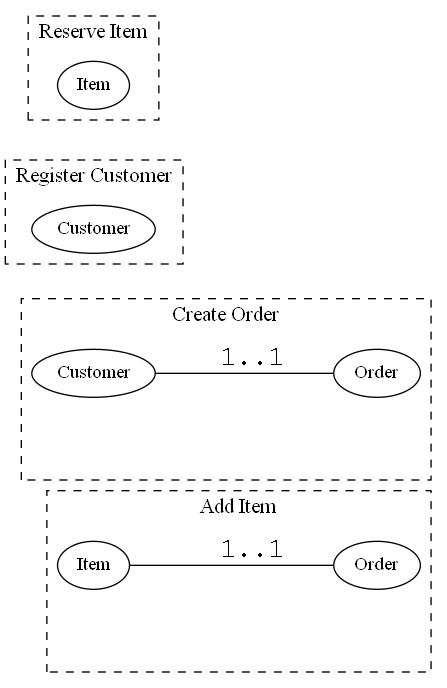

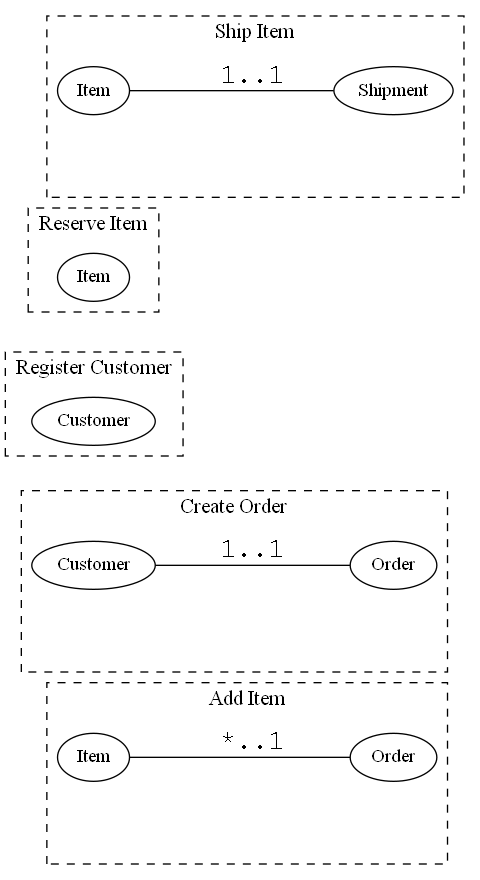

In [41]:
emitted_aer.clear()
control_flow = {}


# One-to-One Relationship in "Add Item" Activity
work_flow1 = [
        {"activity": "Register Customer", "objects": {"Customer": ["c1"]}},
        {"activity": "Create Order", "objects": {"Customer": ["c1"], "Order": ["o1"]}},
        {"activity": "Add Item", "objects": {"Order": ["o1"], "Item": ["i1"]}},
        {"activity": "Reserve Item", "objects": {"Item": ["i1"]}},
        {"activity": "Ship Item", "objects": {"Item": ["i1"], "Shipment": ["s1"]}},
        ]

# One-to-Many Relationship in "Add Item" Activity
work_flow2 = [
        {"activity": "Register Customer", "objects": {"Customer": ["c1"]}},
        {"activity": "Create Order", "objects": {"Customer": ["c1"], "Order": ["o1"]}},
        {"activity": "Add Item", "objects": {"Order": ["o1"], "Item": ["i2","i3"]}},
        {"activity": "Reserve Item", "objects": {"Item": ["i1"]}},
        {"activity": "Ship Item", "objects": {"Item": ["i1"], "Shipment": ["s1"]}},
        ]

src = dict_test_ocel_source([(work_flow1, 10), (work_flow2, 20)], shuffle=False)
src.pipe(
    oc_operator(control_flow=control_flow,relation_max_approx_error=0.1),
    oc_merge_operator(),
).subscribe(lambda x: emitted_aer.append(x["aer_diagram"]))

for i, aer in enumerate(emitted_aer):
    print(f"AER-Diagram {i+1}:")
    print(aer)
    print("\n")

for i, aer in enumerate(emitted_aer):
    if i % 6 == 0:
        dot = visualizer.draw_aer_diagram(aer)
        png_bytes = dot.pipe(format='png')
        display(Image(data=png_bytes))
